# Алгоритм МНК и РМНК



Уравнение линейной скорости от угловой скорости $$v = Rw$$ где $v$ - линейная скорость, $R$ - радиус колеса, а $w$ угловая скорость колеса. <br>
Используя пусть по данным с датчиков получены данные


|Угловая скорость (w) | Линейная скорость (v) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |

# Часть 1: Пакетное решение

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Store the data as column vectors.
w = np.array([0.2, 0.3, 0.4, 0.5, 0.6]).T
v = np.array([1.23, 1.38, 2.06, 2.47, 3.17]).T

Графики измерений, имеющие линейный характер


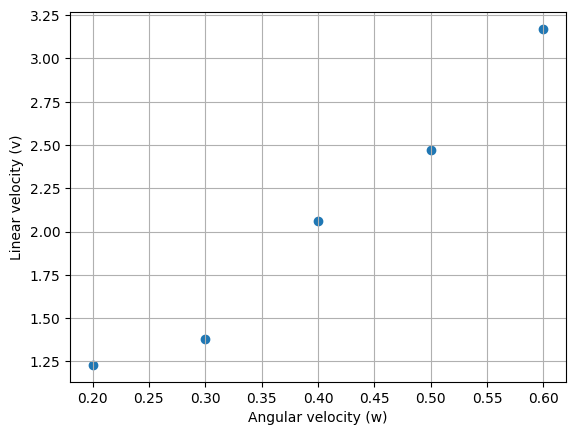

In [3]:
plt.scatter(np.asarray(w), np.asarray(v))

plt.xlabel('Angular velocity (w)')
plt.ylabel('Linear velocity (v)')
plt.grid(True)
plt.show()

## Оценка значения параметра
----
Оценка параметра наклона $R$ используя метод наименьших квадратов:

\begin{align}
\hat{R} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

In [4]:
# Define the H matrix, what does it contain?
H = np.ones(len(w)).reshape(len(w), 1)
H_transp = H.reshape(1, len(w))
R_vect = v / w
# Now estimate the resistance parameter.
# R = ...
R = float(np.dot(inv(np.dot(H_transp, H)),np.dot(H_transp, R_vect)))

print('The slope parameter (i.e., radius) for the best-fit line is:', R)

The slope parameter (i.e., radius) for the best-fit line is: 5.224666666666668


<ipython-input-4-ea7a36d65ea4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R = float(np.dot(inv(np.dot(H_transp, H)),np.dot(H_transp, R_vect)))


In [5]:
R_vect

array([6.15      , 4.6       , 5.15      , 4.94      , 5.28333333])

In [6]:
H

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

## График с результатами
----


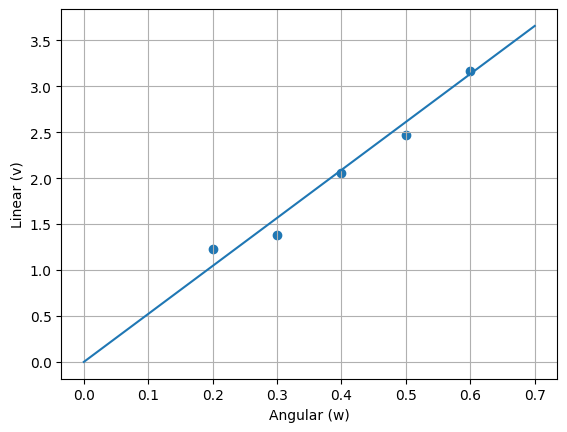

In [7]:
w_line = np.arange(0, 0.8, 0.1)
v_line = R * w_line
plt.scatter(np.asarray(w), np.asarray(v))
plt.plot(w_line, v_line)
plt.xlabel('Angular (w)')
plt.ylabel('Linear (v)')
plt.grid(True)
plt.show()

## Часть 2: Оценка нескольких параметров


----
Теперь учитываем шум в модели, поэтому тепреь модель имеет вид $y = Rx + b$. Мы можем использовать результаты позже для сравнения.
Ответ: b это не что иное как постоянная составляющая ошибки, она одинаково влияет на кажое измерение


In [8]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

w = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
v = np.array([1.23, 1.38, 2.06, 2.47, 3.17])

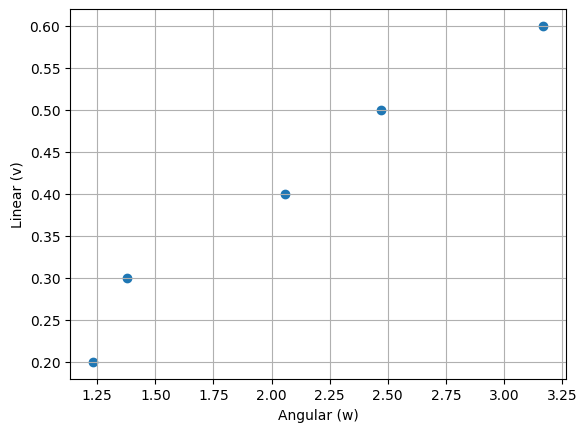

In [9]:
#отобразим на грифике
plt.scatter(v, w)

plt.xlabel('Angular (w)')
plt.ylabel('Linear (v)')
plt.grid(True)
plt.show()

Оцениваем параметр R и b, которые теперь у нас являются элементами вектора x (так как модель уже другая):

$x_{ls} = (H^{T}H)^{-1}H^{T}y$

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[0.2 1. ]
 [0.3 1. ]
 [0.4 1. ]
 [0.5 1. ]
 [0.6 1. ]]
Line parameters correspond ([R, b]):
[4.97  0.074]


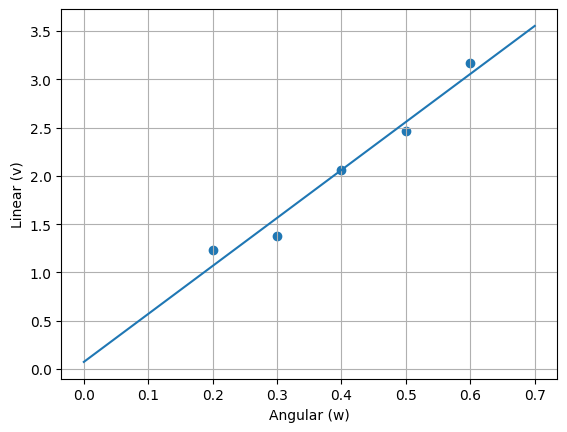

In [10]:
## Batch Solution
H = np.ones((5,2))
print(H)
H[:, 0] = w
print(H)
x_ls = linalg.inv(H.T.dot(H)).dot(H.T.dot(v))

print('Line parameters correspond ([R, b]):')
print(x_ls)

#Plot
w_line = np.arange(0, 0.8, 0.1)
v_line = x_ls[0]*w_line + x_ls[1]

plt.scatter(w, v)
plt.plot(w_line, v_line)
plt.xlabel('Angular (w)')
plt.ylabel('Linear (v)')
plt.grid(True)
plt.show()

In [11]:
H

array([[0.2, 1. ],
       [0.3, 1. ],
       [0.4, 1. ],
       [0.5, 1. ],
       [0.6, 1. ]])

# Часть 3: Рекурсивный МНК

 Линейную модель, которая включает в себя смещение, $y = Rx + b$. Если следовать закону физики ($v = Rw$), мы ожидаем, что это смещение будет около нуля.

Вы будете устанавливать начальные параметры с предположением, что ваша предварительная оценка радиуса колеса $R = 3$, и это довольно грубая оценка. Кроме того, поскольку мы достаточно хорошо знаем, что закон физики справедлив ($v = Rw$), с уверенностью можно предположить, что смещение $b$ будет близко к 0. Инициализируйте оценку следующим образом:

$$\hat{R} \sim \mathcal{N}(3, 10.0), \hat{b} \sim \mathcal{N}(0, 0.3)$$
----


In [12]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

w = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
v = np.array([1.23, 1.38, 2.06, 2.47, 3.17])

## Проверяйте корректность программного кода, которая была для вас подготовлена!!!

Рекурсивная реализация МНК необходима при работе с датчиками в реальном времени


$$
\hat{\mathbf{x}}_0 = E\left[\mathbf{x}\right] \,\,\, , \,\,\, \mathbf{P}_0 = E\left[(\mathbf{x} - \hat{\mathbf{x}}_0)(\mathbf{x} - \hat{\mathbf{x}}_0)^T\right]
$$


In [13]:
## Рекурсивное решение
#Инициализируем ковариационную матрицу
# P_k = ...
P_k = np.zeros((2, 2), float)
presicion = np.array([10, 0.3])
print(presicion)
np.fill_diagonal(P_k, presicion)

#Инициализировать оценку параметра x
x_k = np.array(([3, 0]))
print(x_k.reshape(2,1))

#отклонение измерения (используется для расчет R_k)
v_k = 0.0225 #simga

#Ковариационная матрица шумов
R = np.zeros((5,5))
np.fill_diagonal(R,w*v_k)

#сохраним исторические данные для визуализации в конце работы
num_meas = v.shape[0]
x_hist = np.zeros((2,num_meas + 1))
P_hist = np.zeros((num_meas + 1,2,2))

print("P_k",P_k)
#запишем первичные значения
x_hist[:,0] = x_k
P_hist[0] = P_k

print("x_k=", x_k)
print("P_k=", P_k)
print("num_meas=", num_meas)
print("R = ",R)
print(x_hist)

[10.   0.3]
[[3]
 [0]]
P_k [[10.   0. ]
 [ 0.   0.3]]
x_k= [3 0]
P_k= [[10.   0. ]
 [ 0.   0.3]]
num_meas= 5
R =  [[0.0045  0.      0.      0.      0.     ]
 [0.      0.00675 0.      0.      0.     ]
 [0.      0.      0.009   0.      0.     ]
 [0.      0.      0.      0.01125 0.     ]
 [0.      0.      0.      0.      0.0135 ]]
[[3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


**Для каждого измерения k**:

----
  * Рассчитать поправочный коэффициент усиления $$\mathbf{K}_k = \mathbf{P}_{k-1}\mathbf{H}_k^T\left(\mathbf{H}_k\mathbf{P}_{k-1}\mathbf{H}_k^T + \mathbf{R}_k\right)^{-1}$$
  * Обновить оценку параметра $$\hat{\mathbf{x}}_k = \hat{\mathbf{x}}_{k-1} + \mathbf{K}_k\left(\mathbf{y}_k - \mathbf{H}_k\hat{\mathbf{x}}_{k-1}\right)$$
  * Обновить оценку ковариации $$\mathbf{P}_k = \left(\mathbf{1} - \mathbf{K}_k\mathbf{H}_k\right)\mathbf{P}_{k-1}$$

In [14]:
k = 0
I = np.ones((2,2))
H_k = np.ones((1,2))
for k in range(num_meas):
  H_k[:,0] = w[k]
  K_k = np.dot(P_hist[k],H_k.T) / (np.dot(H_k.dot(P_hist[k]),H_k.T)+R[k][k])

  x_hist[:,k+1] = x_hist[:,k] + K_k.dot(v[k]-np.dot(H_k,x_hist[:,k]))
  P_hist[k+1] = np.dot(I-K_k.dot(H_k),P_hist[k])
print(x_hist[:,5])

[5.22238973 0.03607536]


## Визуализация результатов


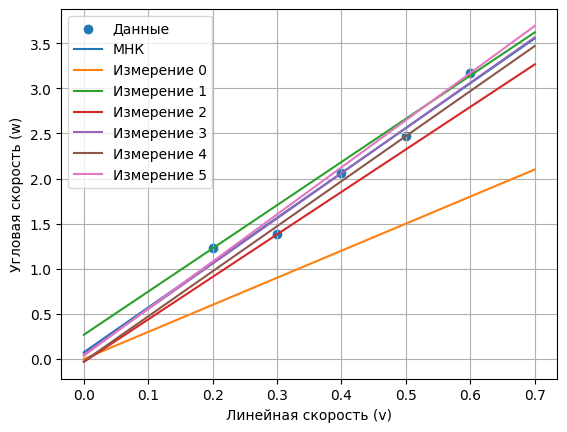

[[ 3.          4.78850248  4.71160562  5.01612083  4.99412384  5.22238973]
 [ 0.          0.26827537 -0.03278497  0.0528696  -0.02688815  0.03607536]]


In [15]:
#Plot
plt.scatter(w, v, label='Данные')
plt.plot(w_line, v_line, label='МНК')
plt.xlabel('Линейная скорость (v)')
plt.ylabel('Угловая скорость (w)')
plt.grid(True)

w_line = np.arange(0, 0.8, 0.1)
for k in range(num_meas+1):
    v_line = x_hist[:,k][0]*w_line + x_hist[:,k][1]
    plt.plot(w_line, v_line, label='Измерение {}'.format(k))

plt.legend()
plt.show()
print(x_hist)